# EXAMEN CURSO IMAGE PROCESSING - PUC EEIGM October 2024 (20min)
Test 2 |
**Christian Mata**

Puedes utilizar los materiales del curso durante el examen.
Por favor, utiliza este cuaderno de Python para completar las siguientes preguntas:

# Image processing

  1. Lee una imagen en color y muestra el histograma original. Aplica ruido a la imagen y muestra el histograma. Compara ambos resultados. (Intenta mostrar una figura con dos imágenes).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


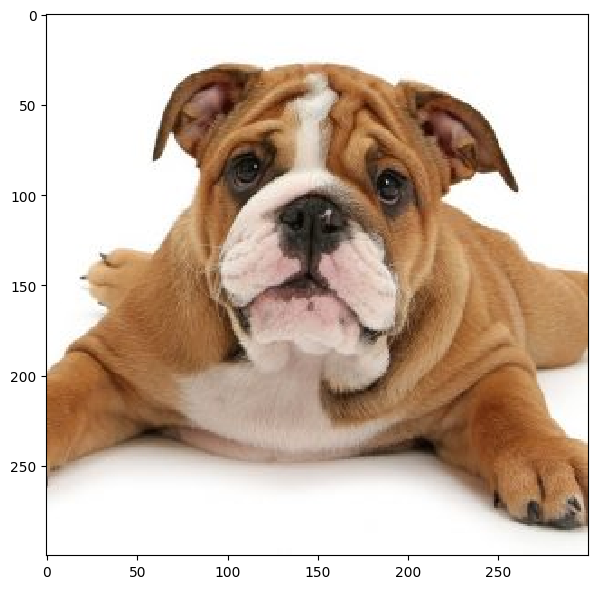

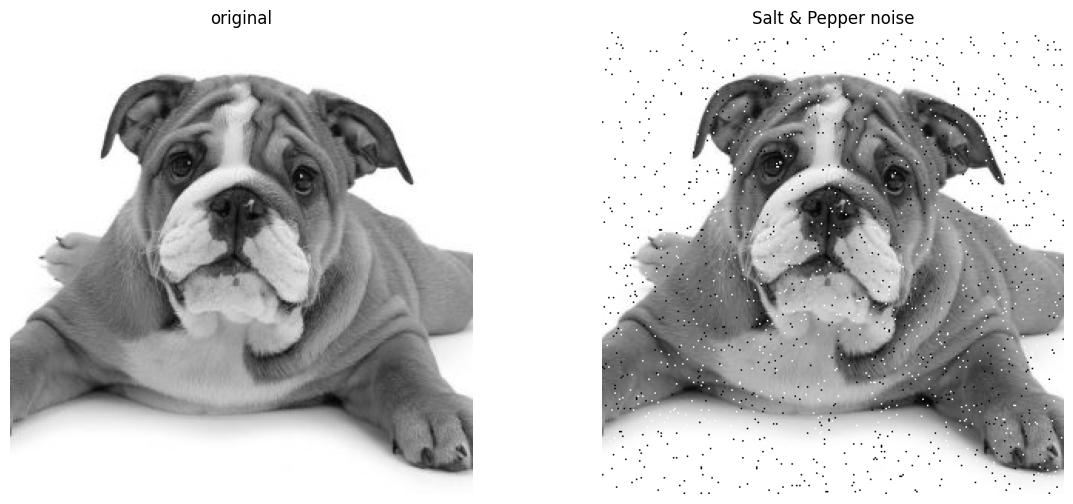

In [11]:
from google.colab import drive
drive.mount('/content/drive')

import skimage as sk # Import skimage as sk
import matplotlib.pyplot as plt # Import matplotlib.pyplot

file_path = '/content/drive/MyDrive/Image processing/dog_image.jpg'
I = sk.io.imread(file_path) # read image using imread function
I.shape

fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function, corrected variable to I
plt.show() # use plt.show() instead of sk.io.show() from matplotlib.pyplot

IG = sk.color.rgb2gray(I)
IG.shape

v = IG.reshape(IG.shape[0]*IG.shape[1],1) #conversion de la matrice en un vecteur pr pvoir tracer l'histogramme

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False) #
plt.show()

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(img)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

#différentes techniques pr éliminer le bruit dont Gauss distribution
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

2. Ahora, ¿cómo podemos eliminar el ruido? Intenta utilizar diferentes filtros para corregir la imagen y muestra los resultados.

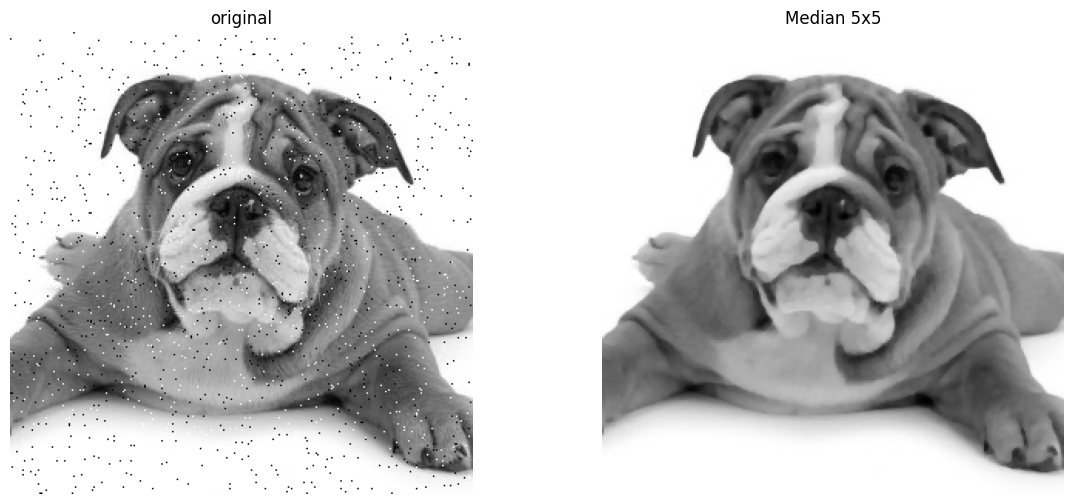

In [5]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')


3. Segmentación no supervisada de una imagen en color: Descarga una imagen en color RGB, conviértela a escala de grises y aplica un algoritmo de k-means para segmentar las diferentes estructuras.

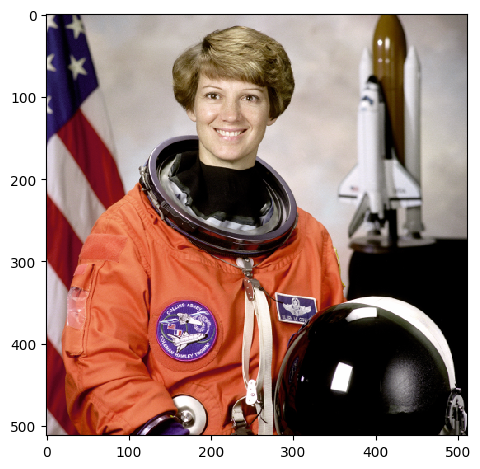

M = 512 columns, N = 512 rows, NC = 3 color channels


In [12]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show()
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size



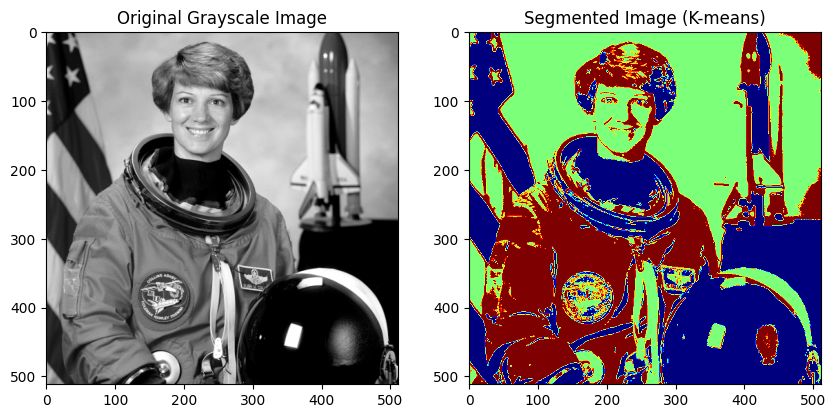

In [14]:
from sklearn.cluster import KMeans
from skimage.color import rgb2gray

Ig = rgb2gray(IC)

pixels = Ig.reshape((-1, 1))

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(pixels)
segmented_image = kmeans.labels_.reshape(image_gray.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[1].imshow(segmented_image, cmap='jet')
ax[1].set_title('Segmented Image (K-means)')
plt.show()

4. De la imagen segmentada anterior aplica las técnicas necesarias para obtener propiedades de textura y entropía.

5. Explica brevemente porque la extracción de características de una imagen puede ser útil para el estudio de materiales?